# CP1 Blatt8 Abgabe Lapp & Brieden
### erstellt von Tobias Lapp und Sven Brieden am 17.12.2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
#from scipy.optimize import fmin
#import scipy.constants as constants
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20.0, 4.0)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 16

## 8.2. Vibrating beams

Numerische Ableitungen bis 4en Grades mit Darstellung von $f(x) = \sin(x)$ als Test

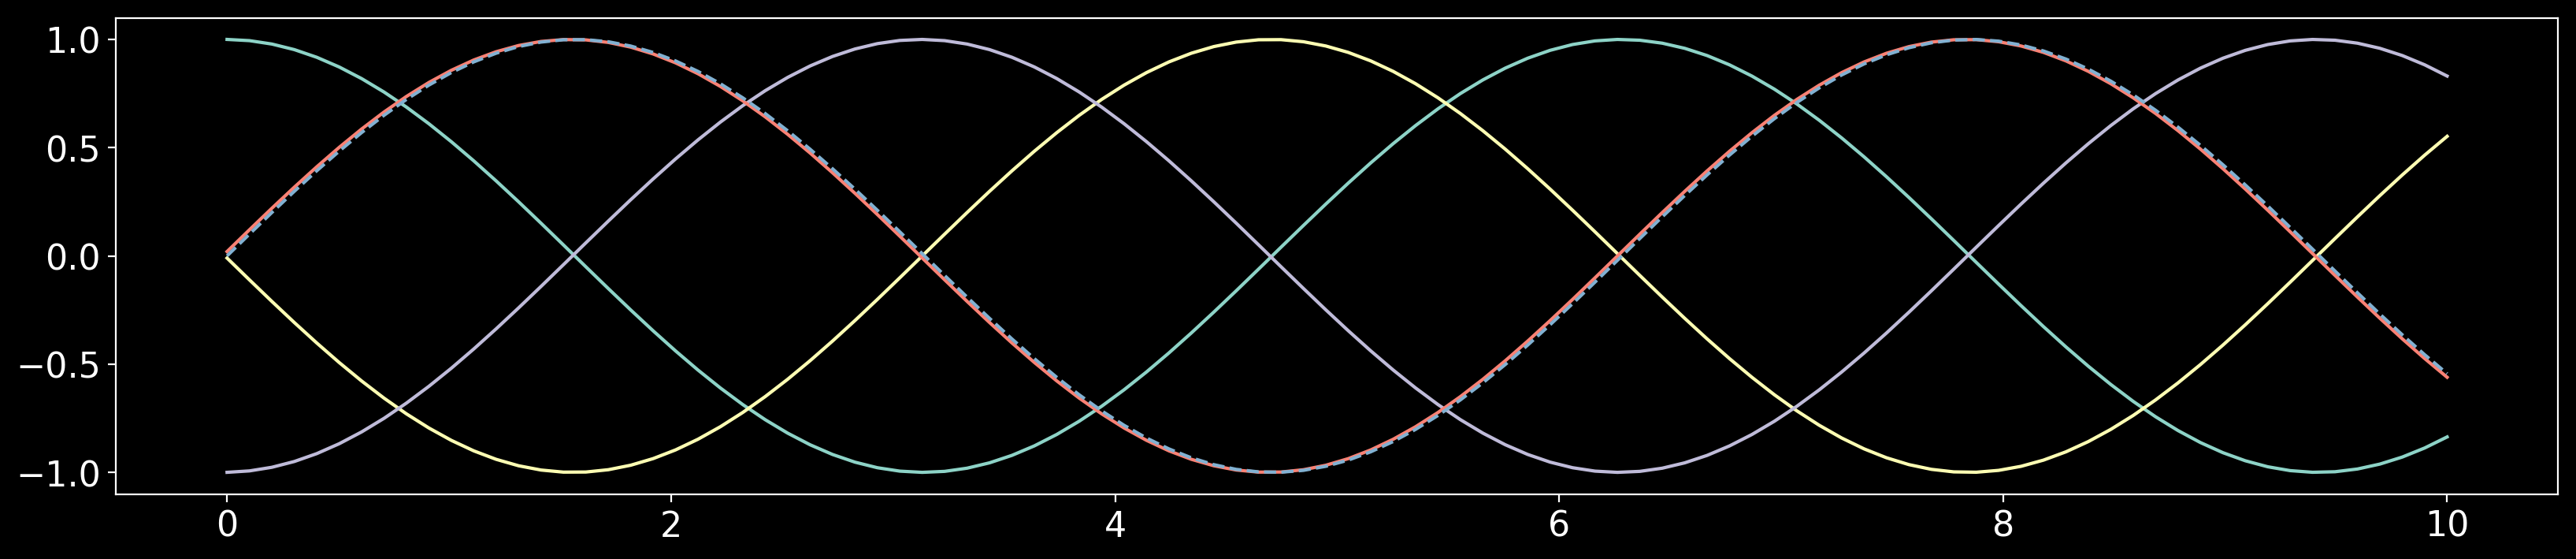

In [93]:
du_dx = lambda x, fun, h: (fun(x + h) - fun(x)) / h
d2u_dx2 = lambda x, fun, h: (fun(x + 2*h) - 2 * fun(x + h) + fun(x)) / h**2
d3u_dx3 = lambda x, fun, h: (fun(x + 3*h) - 3 * fun(x + 2*h) + 3 * fun(x + h) - fun(x)) / h**3
d4u_dx4 = lambda x, fun, h: (fun(x + 4*h) - 4 * fun(x + 3*h) + 6*fun(x + 2*h) - 4*fun(x + h) + fun(x)) / h**4

x = np.linspace(0, 10, 100)
funk = lambda x: np.sin(x)
plt.plot(x,  du_dx(x,funk, 1e-2)), plt.plot(x,d2u_dx2(x,funk, 1e-2))
plt.plot(x,d3u_dx3(x,funk, 1e-2)), plt.plot(x,d4u_dx4(x,funk, 1e-2))
plt.plot(x,np.sin(x) , "--")

Differenzial als Vektorgleichung

([<matplotlib.lines.Line2D at 0x7f919f190dd8>],
 [<matplotlib.lines.Line2D at 0x7f919f190f28>])

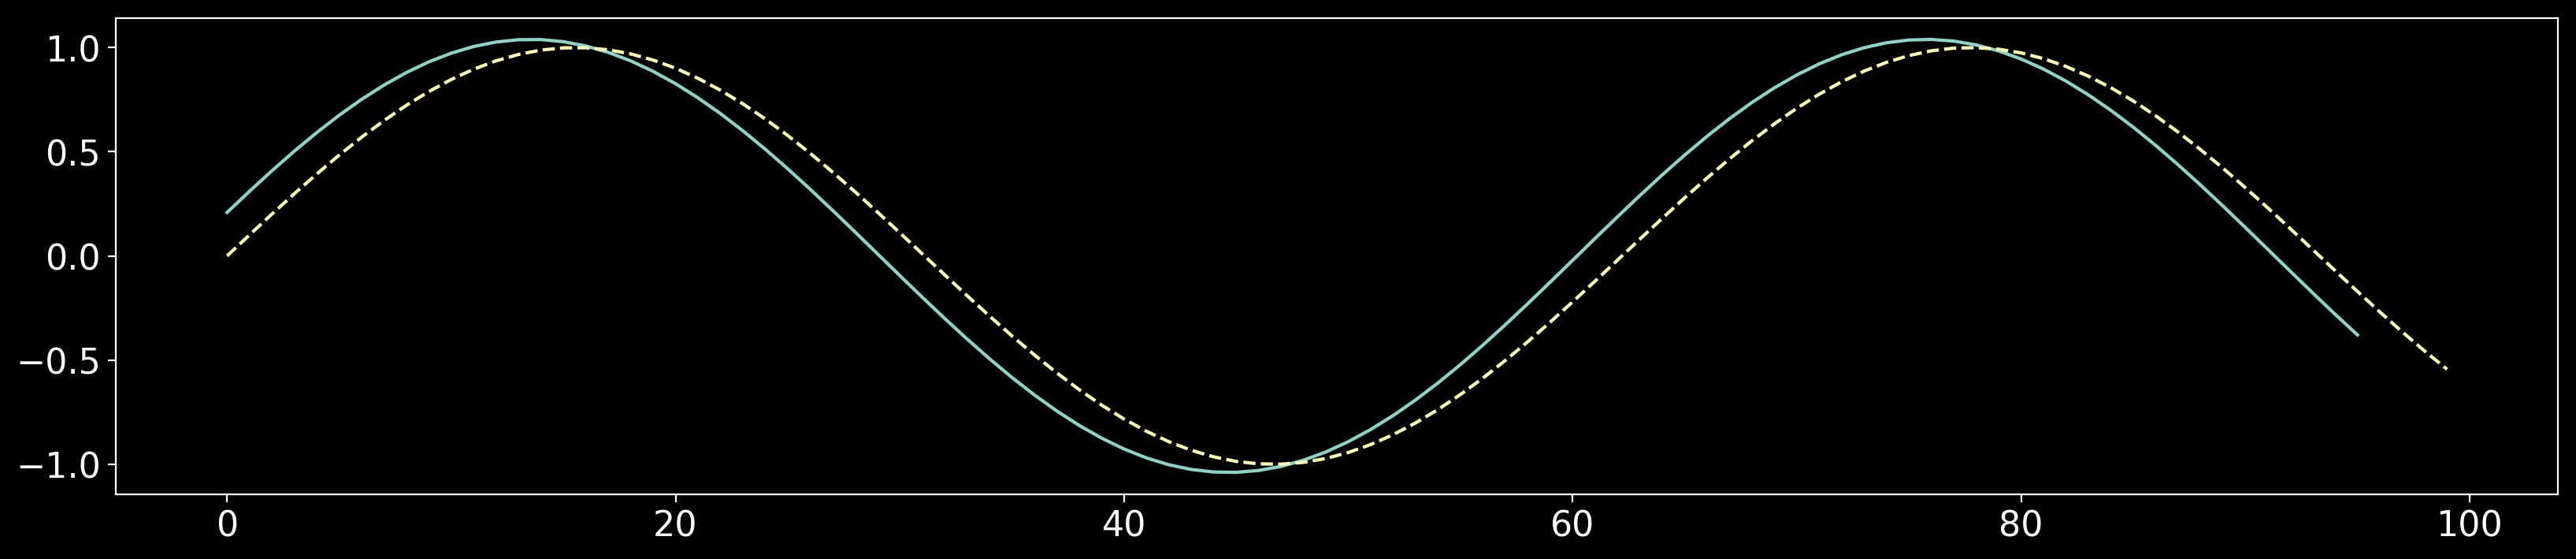

In [94]:
x_min, x_max, points = 0, 10, 100
x, dx = np.linspace(x_min, x_max, points), (x_max - x_min) / points
y = np.sin(x)
D4x = (y[4:] - 4 * y[3:-1] + 6 * y[2:-2] - 4 * y[1:-3] + y[:-4]) / dx **4
plt.plot(D4x), plt.plot(y, "--")

Differenzial als Matrixgleichung

([<matplotlib.lines.Line2D at 0x7f919cf0f828>],
 [<matplotlib.lines.Line2D at 0x7f919cf0f978>])

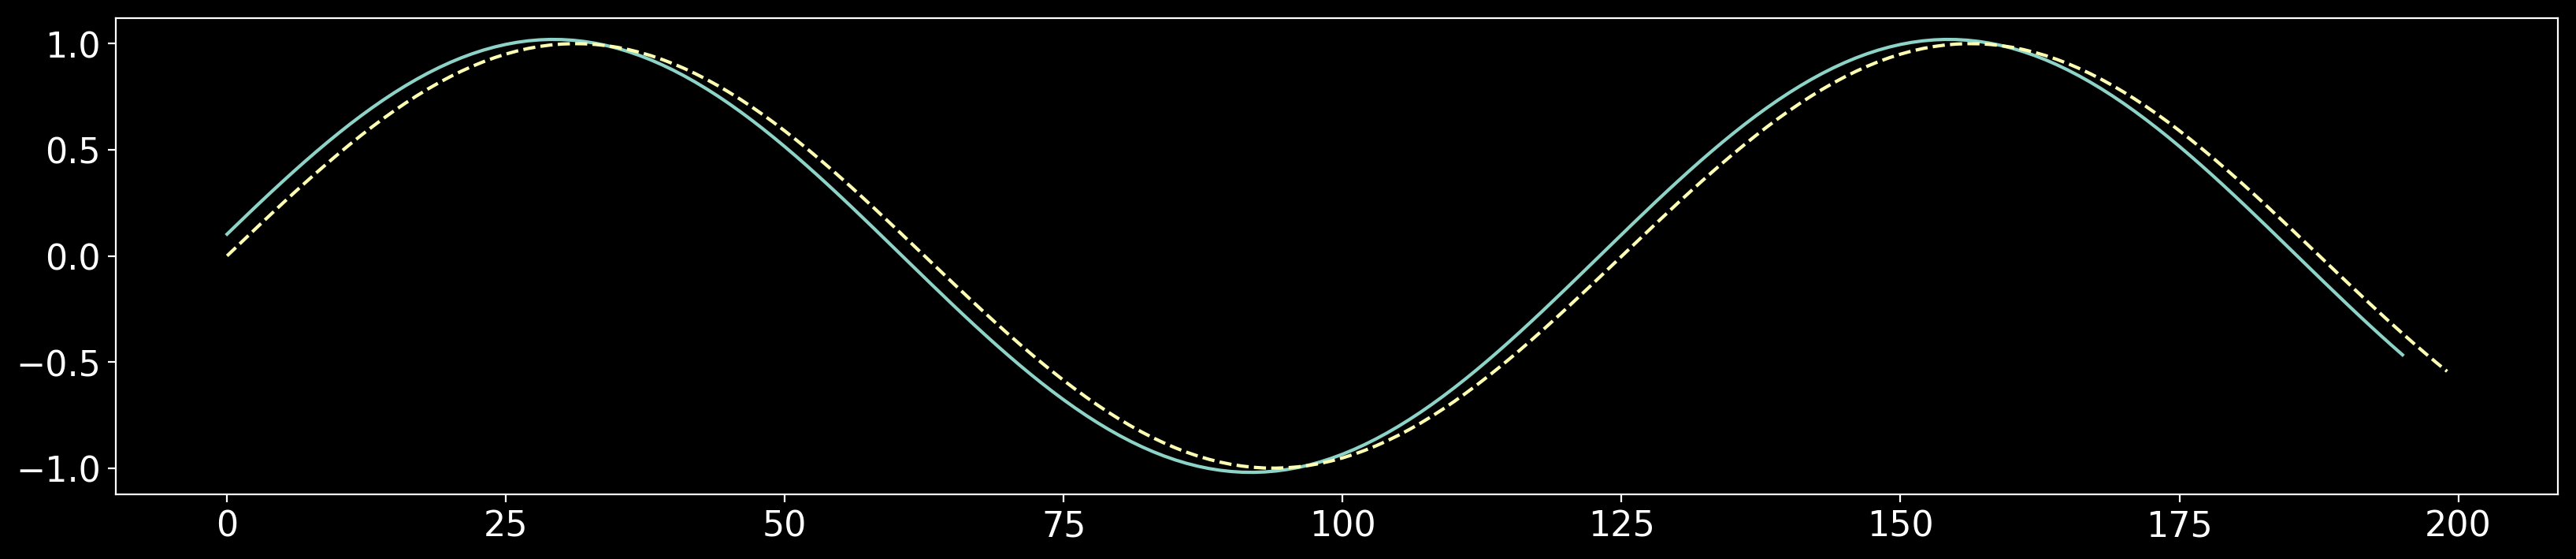

In [132]:
x_min, x_max, points = 0, 10, 200
x, dx = np.linspace(x_min, x_max, points), (x_max - x_min) / points
y = np.sin(x)

D4_Matrix = (np.eye(points) 
                 - 4 * np.eye(points, k=1) + 6 * np.eye(points, k=2) 
                 - 4 * np.eye(points, k=3) + np.eye(points, k=4)
            ) / dx**4
plt.plot(np.dot(D4_Matrix, y)[:-4]), plt.plot(y, "--")

values, vectors = np.linalg.eig(D4_Matrix)

Leider haben wir keine ordentlichen Eigenwerte bekommen um damit weiter zu rechnen.

## 8.3. Euler constant

([],
 Text(0.5,0,' Number of terms in the sum N'),
 Text(0,0.5,'difference to the literary value'))

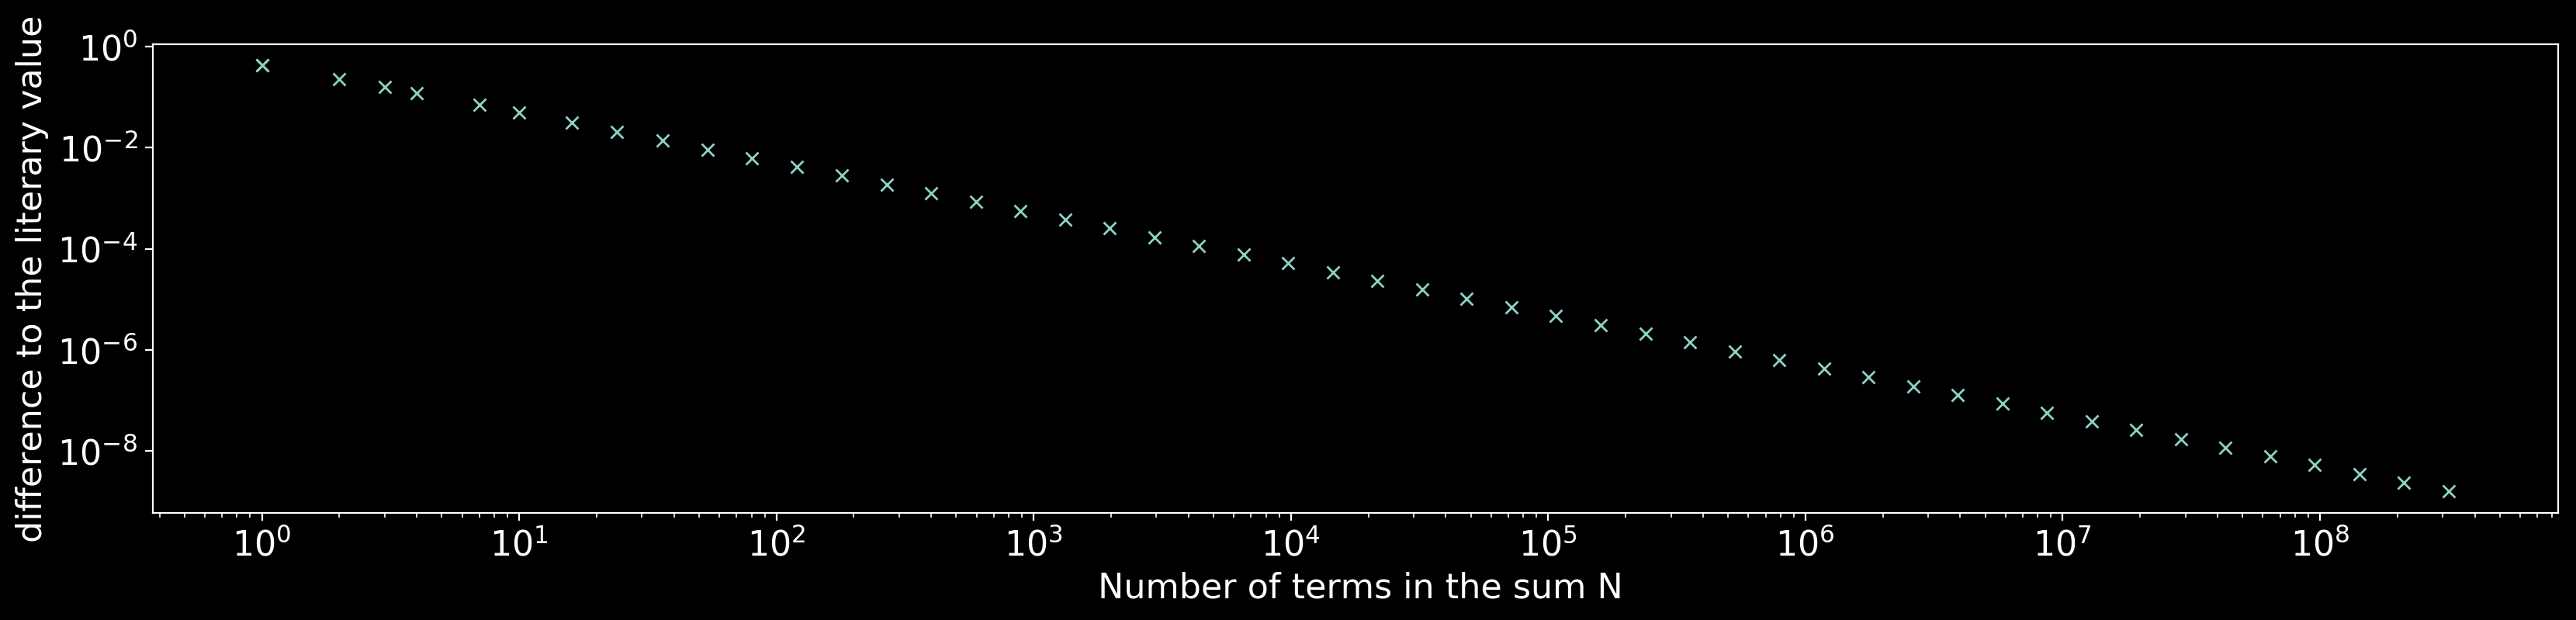

In [72]:
N = np.logspace(0, 8.5, 50)
γ_wiki = 0.5772156649015328606065120900824024310421593359399235988057672348848677267776646709369470632917467495
γ = lambda N: sum([1/(N - n) for n in range(N)]) - np.log(N) - γ_wiki
plt.plot([int(N_n) for N_n in N], [γ(int(N_n)) for N_n in N], "x")
plt.loglog(), plt.xlabel(" Number of terms in the sum N"), plt.ylabel("difference to the literary value")